<a href="https://colab.research.google.com/github/nitheesh1213/nitheesh1213-ML-taitanic-data-training-1/blob/main/ML_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import re
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [83]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [84]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
# Pre process complete training and testing data

# 1.Changing sex to 0's and 1's 
train_data['Sex'] = train_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test_data['Sex'] = test_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# 2.Remove all NULLS in the Age column in train data
train_average_age = train_data['Age'].mean()
train_data.loc[np.isnan(train_data['Age']), 'Age'] = train_average_age

# 3.Remove all NULLS in the Age column in test data
test_average_age = test_data['Age'].mean()
test_data.loc[np.isnan(test_data['Age']), 'Age'] = test_average_age

# 4.Making Age as Int
train_data['Age'] = train_data['Age'].astype(int)
test_data['Age'] = test_data['Age'].astype(int)

# 5.Making continuos Age to discrete for train data
train_data.loc[train_data['Age'] <= 15, 'Age'] = 0
train_data.loc[(train_data['Age'] > 15) & (train_data['Age'] <= 30), 'Age'] = 1
train_data.loc[(train_data['Age'] > 30) & (train_data['Age'] <= 45), 'Age'] = 2
train_data.loc[(train_data['Age'] > 45) & (train_data['Age'] <= 60), 'Age'] = 3
train_data.loc[train_data['Age'] > 60, 'Age'] = 4

# 6.Making continuos Age to discrete for test data
test_data.loc[train_data['Age'] <= 15, 'Age'] = 0
test_data.loc[(test_data['Age'] > 15) & (test_data['Age'] <= 30), 'Age'] = 1
test_data.loc[(test_data['Age'] > 30) & (test_data['Age'] <= 45), 'Age'] = 2
test_data.loc[(test_data['Age'] > 45) & (test_data['Age'] <= 60), 'Age'] = 3
test_data.loc[test_data['Age'] > 60, 'Age'] = 4

# 7.Making continuos Fare to discrete for train data
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())
train_data.loc[train_data['Fare'] <= 10, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 10) & (train_data['Fare'] <= 20), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 20) & (train_data['Fare'] <= 100), 'Fare'] = 2
train_data.loc[train_data['Fare'] > 100, 'Fare'] = 3

# 8.Making continuos Fare to discrete for test data
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
test_data.loc[test_data['Fare'] <= 10, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 10) & (test_data['Fare'] <= 20), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 20) & (test_data['Fare'] <= 100), 'Fare'] = 2
test_data.loc[test_data['Fare'] > 100, 'Fare'] = 3

# 9.Making Fare as Int
train_data['Fare'] = train_data['Fare'].astype(int)
test_data['Fare'] = test_data['Fare'].astype(int)

# 10. Dropping unwanted variables
train_data = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test_data = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# 11. Changing Embarked to Int
train_data['Embarked'] = train_data['Embarked'].fillna('S')
test_data['Embarked'] = test_data['Embarked'].fillna('S')
train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [88]:
train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,0,0
1,1,1,0,2,1,0,2,1
2,1,3,0,1,0,0,0,0
3,1,1,0,2,1,0,2,0
4,0,3,1,2,0,0,0,0


In [89]:
test_data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0,0,0,0,2
1,3,0,0,1,0,0,0
2,2,1,0,0,0,0,2
3,3,1,0,0,0,0,0
4,3,0,0,1,1,1,0


In [90]:
# Training the data
f = train_data.drop("Survived", axis=1)
t = train_data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(f,t,test_size=0.5,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((445, 7), (446, 7), (445,), (446,))

Accuracy: 79.37
Cross validated: 80.59


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


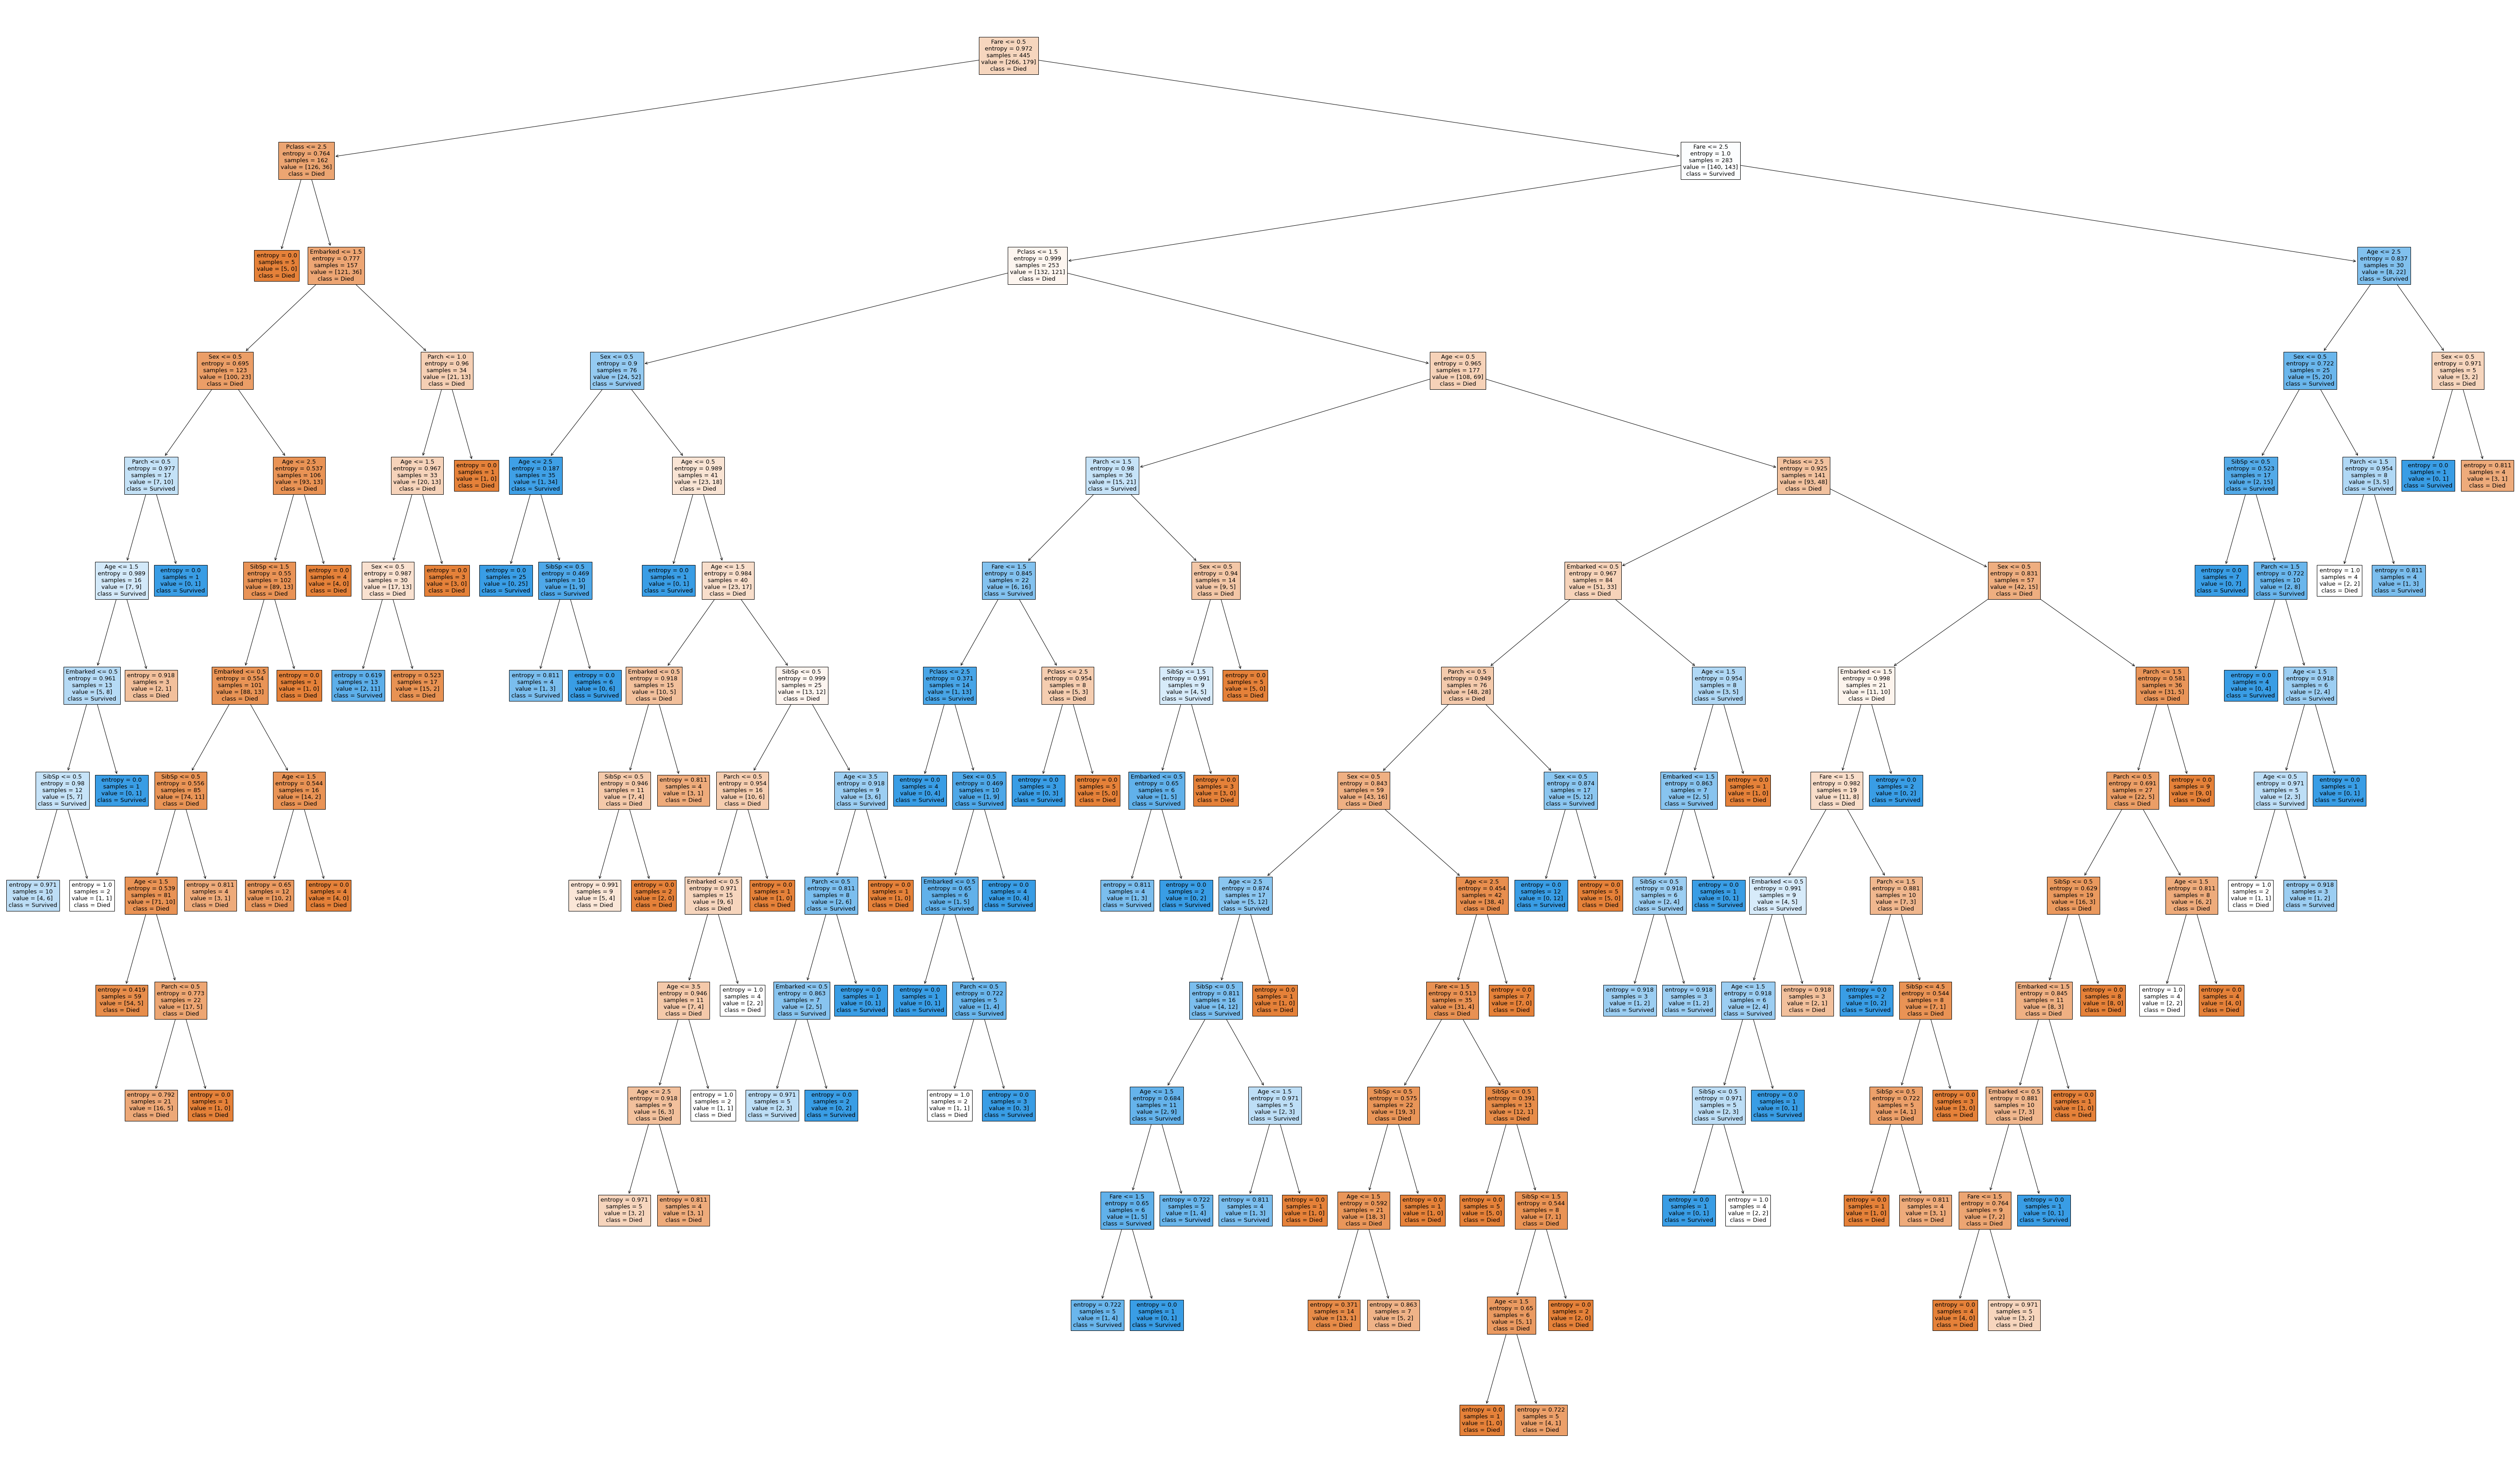

In [96]:
# Drawing Decision Tree
trained_model = DecisionTreeClassifier(criterion='entropy', max_features='auto', min_samples_split=5, min_samples_leaf=1)
trained_model.fit(X_train,y_train)
prediction_tree = trained_model.predict(X_test)
print('Accuracy:',round(accuracy_score(prediction_tree,y_test)*100,2))
kfold = KFold(n_splits=5, random_state=1)
result_tree = cross_val_score(trained_model,f,t,cv=5,scoring='accuracy')
print('Cross validated:',round(result_tree.mean()*100,2))
plt.figure(figsize=(100,60))
p = tree.plot_tree(
    trained_model,
    feature_names = list(train_data.drop(['Survived'], axis=1)),
    class_names = ['Died', 'Survived'],
    filled=True)

In [92]:
# Drawing Random Forest
model = RandomForestClassifier(
    criterion='entropy',
    n_estimators=1000,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='auto',
    oob_score=True,
    n_jobs=-1)
model.fit(X_train,y_train)
prediction_forest=model.predict(X_test)
print('Accuracy:', round(accuracy_score(prediction_forest,y_test)*100,2))
kfold = KFold(n_splits=5)
result_rm=cross_val_score(model,f,t,cv=5,scoring='accuracy')
print('Cross validated',round(result_rm.mean()*100,2))
p = cross_val_predict(model,f,t,cv=5)

Accuracy: 80.04
Cross validated 81.82
